In [1]:
import pandas as pd
import numpy as np
import matplotlib
import scipy.stats
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')
data.head()

,Отметка времени,eye_color,hair_color,hair_texture,age
0,2.18.2023 16:58:52,1,1,1,20
1,2.18.2023 16:59:55,1,2,1,20
2,2.18.2023 17:01:10,2,1,2,21
3,2.18.2023 17:01:15,2,2,2,19
4,2.18.2023 17:01:35,3,2,1,18


In [5]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size=0.5, stratify=data.eye_color, random_state=1)
len(data)

127

In [77]:
freq_eye_train = data_train['eye_color'].value_counts(sort=False).sort_index()
freq_eye_train


1    25
2    13
3    15
4    10
Name: eye_color, dtype: int64

In [78]:
freq_eye_test = data_test['eye_color'].value_counts(sort=False).sort_index()
freq_eye_test

1    25
2    14
3    15
4    10
Name: eye_color, dtype: int64

In [79]:
eyes_color = {
    "1": "brown",
    "2" :"blue",
    "3": "green",
    "4": "gray", 
}
hair_color = {
    "1": "brown",
    "2": "rusie",
    "3": "red",
    "4": "black",
    "5": "blond",
    "6": "kashtan",
    "7": "svetlo-rus"
}
hair_texture = {
    "1": "fair",
    "2": "wavy",
    "3": "curlyish",
    "4": "curly"   
}

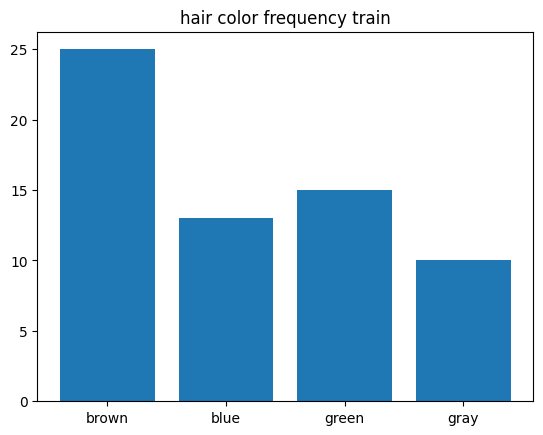

In [80]:
plt.figure()
plt.bar(list(eyes_color.values()), freq_eye_train)
plt.title('hair color frequency train')
plt.show()

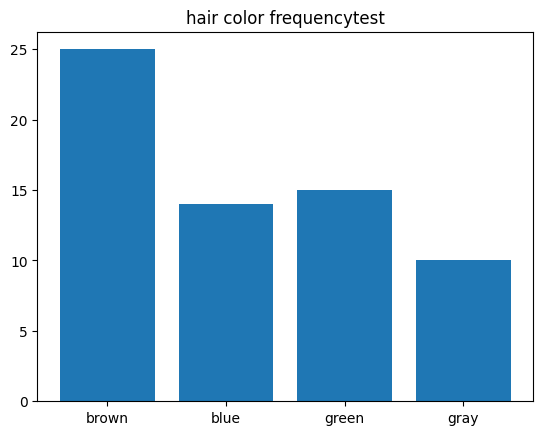

In [81]:
plt.figure()
plt.bar(list(eyes_color.values()), freq_eye_test)
plt.title('hair color frequencytest')
plt.show()

In [82]:
hair_texture_test = data_test['hair_texture'].value_counts(sort=False).sort_index()
hair_texture_test

1    37
2    16
3     2
4     9
Name: hair_texture, dtype: int64

In [83]:
hair_texture_train = data_train['hair_texture'].value_counts(sort=False).sort_index()
hair_texture_train

1    37
2    13
3     6
4     7
Name: hair_texture, dtype: int64

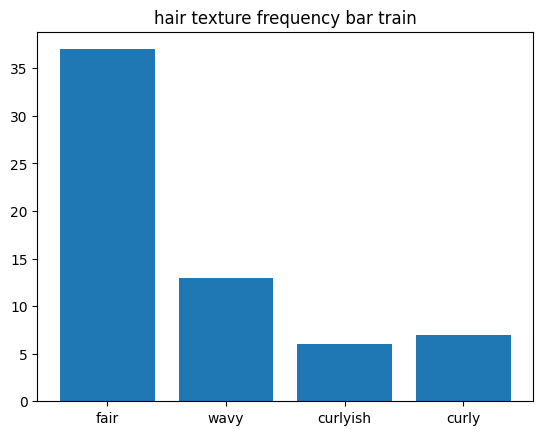

In [84]:
plt.figure()
plt.bar(list(hair_texture.values()), hair_texture_train)
plt.title('hair texture frequency bar train')
plt.show()

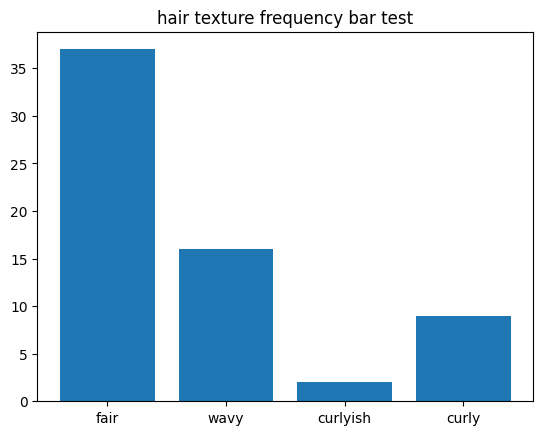

In [85]:
plt.figure()
plt.bar(list(hair_texture.values()), hair_texture_test)
plt.title('hair texture frequency bar test')
plt.show()

In [86]:
hair_color_test = data_test['hair_color'].value_counts(sort=False).sort_index()
hair_color_test

1    11
2    19
3     5
4     7
5     4
6     6
7    12
Name: hair_color, dtype: int64

In [87]:
hair_color_train = data_train['hair_color'].value_counts(sort=False).sort_index()
hair_color_train

1     8
2    24
3     5
4     7
5     2
6    12
7     5
Name: hair_color, dtype: int64

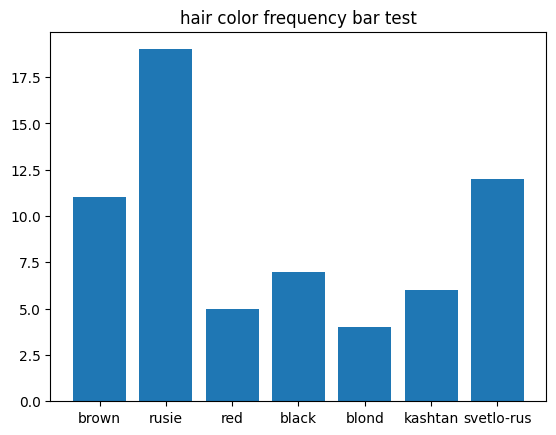

In [88]:
plt.figure()
plt.bar(list(hair_color.values()), hair_color_test)
plt.title('hair color frequency bar test')
plt.show()

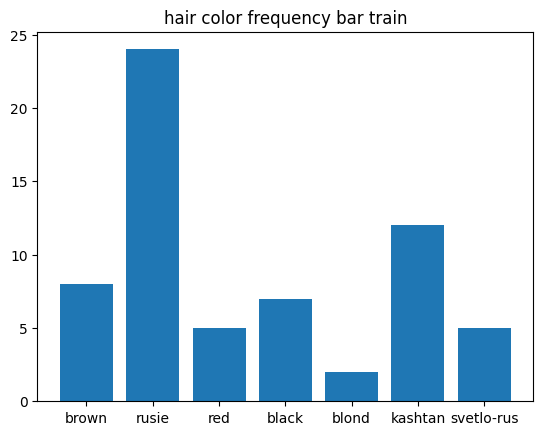

In [89]:
plt.figure()
plt.bar(list(hair_color.values()), hair_color_train)
plt.title('hair color frequency bar train')
plt.show()

In [37]:
from copulas.univariate import BetaUnivariate

class PupilGenerator:
    def __init__(self):
        self.model_age = None
        self.mean_age1 = None
        self.p_brown_eyes = None
        self.p_blue_eyes = None
        self.p_green_eyes = None
        self.p_gray_eyes = None

        self.mean_hair_color = {
            "brown": None,
            "blue": None,
            "green": None,
            "gray": None
        }
        self.mean_hair_texture = {
            "brown": None,
            "blue": None,
            "green": None,
            "gray": None
        }
        self.covariance = {
            "brown": None,
            "blue": None,
            "green": None,
            "gray": None
        }
    
    def fit(self, X):
        brown_eyes_samples = X[X.eye_color == 1]
        blue_eyes_samples = X[X.eye_color == 2]
        green_eyes_samples = X[X.eye_color == 3]
        gray_eyes_samples = X[X.eye_color == 4]
        
        #self.mean_age1 = np.mean(X.age)

        self.model_age = BetaUnivariate()
        self.model_age.fit(X['age'])
        
        self.p_brown_eyes = len(brown_eyes_samples)/len(X)
        self.p_blue_eyes = len(blue_eyes_samples)/len(X)
        self.p_green_eyes = len(green_eyes_samples)/len(X)
        self.p_gray_eyes = len(gray_eyes_samples)/len(X)    

        self.mean_hair_color["brown"] = np.mean(brown_eyes_samples.hair_color)
        self.mean_hair_color["blue"] = np.mean(blue_eyes_samples.hair_color)
        self.mean_hair_color["green"] = np.mean(green_eyes_samples.hair_color)
        self.mean_hair_color["gray"] = np.mean(gray_eyes_samples.hair_color)
        
        self.mean_hair_texture["brown"] = np.mean(brown_eyes_samples.hair_texture)
        self.mean_hair_texture["blue"] = np.mean(blue_eyes_samples.hair_texture)
        self.mean_hair_texture["green"] = np.mean(green_eyes_samples.hair_texture)
        self.mean_hair_texture["gray"] = np.mean(gray_eyes_samples.hair_texture)
        
        self.covariance["brown"]  = np.cov(brown_eyes_samples.hair_color, brown_eyes_samples.hair_texture)
        self.covariance["blue"]  = np.cov(blue_eyes_samples.hair_color, blue_eyes_samples.hair_texture)
        self.covariance["green"] = np.cov(green_eyes_samples.hair_color, green_eyes_samples.hair_texture)
        self.covariance["gray"] = np.cov(gray_eyes_samples.hair_color, gray_eyes_samples.hair_texture)
        
    def generate_samples(self, n):
        sample_age = self.model_age.sample(n)
        #pd.Series.plot(sample_age)
        result = np.empty((n, 2))
        result_pupil = np.empty(n, dtype = object)
        
        for i in range(n):
            pupil = np.random.choice(["brown","blue","green","gray"], p=[self.p_brown_eyes, self.p_blue_eyes,
                                                                                self.p_green_eyes, self.p_gray_eyes])
            
            if(str(pupil) == "brown"):
                result_pupil[i] = 1
            elif(str(pupil) == "blue"):
                result_pupil[i] = 2
            elif(str(pupil) == "green"):
                result_pupil[i] = 3
            else:
                result_pupil[i] = 4 
            
            result[i] = np.random.multivariate_normal(mean=[self.mean_hair_color[pupil], self.mean_hair_texture[pupil]],
                                                      cov=self.covariance[pupil])
            result[i][0] = result[i][0].astype(int)
            result[i][1] = result[i][1].astype(int)
            
            
            while result[i][0] < 0.9:
                result[i][0] += 1 
            while result[i][0] > 7.1:
                result[i][0] -= 1
                
            while result[i][1] < 0.9:
                result[i][1] += 1 
            while result[i][1] > 4.1:
                result[i][1] -= 1
                
        return pd.DataFrame(dict(eye_color = result_pupil, hair_color = np.ceil(result[:, 0]).astype(int),
                                 hair_texture = (result[:, 1]).astype(int), age = sample_age.astype(int))) #age = [self.mean_age1] * n)
    
    def log_likehood(self, X):
        brown_eyes_samples = X[X.eye_color == 1][["hair_color", "hair_texture"]]
        blue_eyes_samples = X[X.eye_color == 2][["hair_color", "hair_texture"]]
        gray_eyes_samples = X[X.eye_color == 3][["hair_color", "hair_texture"]]
        green_eyes_samples = X[X.eye_color == 4][["hair_color", "hair_texture"]]
        
        brown_eyes_likehood = np.log(self.p_brown_eyes *
            scipy.stats.multivariate_normal.pdf(
                brown_eyes_samples, 
                mean=[self.mean_hair_color["brown"],self.mean_hair_texture["brown"]], 
                cov=self.covariance["brown"]))
        
        green_eyes_likehood = np.log(self.p_green_eyes *
            scipy.stats.multivariate_normal.pdf(
                green_eyes_samples, 
                mean=[self.mean_hair_color["green"],self.mean_hair_texture["green"]], 
                cov=self.covariance["green"]))
        
        
        gray_eyes_likehood = np.log(self.p_gray_eyes *
            scipy.stats.multivariate_normal.pdf(
                gray_eyes_samples, 
                mean=[self.mean_hair_color["gray"],self.mean_hair_texture["gray"]], 
                cov=self.covariance["gray"]))
        
        blue_eyes_likehood = np.log(self.p_blue_eyes *
            scipy.stats.multivariate_normal.pdf(
                brown_eyes_samples, 
                mean=[self.mean_hair_color["blue"],self.mean_hair_texture["blue"]], 
                cov=self.covariance["blue"]))
        return np.array([brown_eyes_likehood.mean(), blue_eyes_likehood.mean(),
                         green_eyes_likehood.mean(), gray_eyes_likehood.mean()])
    
    def mean_log_likehood(self, X):
        return self.log_likehood(X).mean()
        

In [49]:
generator = PupilGenerator()
generator.fit(data_train)
samples = generator.generate_samples(127)

print(f"Train: {generator.mean_log_likehood(data_train)}")
print(f"Test: {generator.mean_log_likehood(data_test)}")
print(f"Generated: {generator.mean_log_likehood(new_samples)}")

C:\Users\georg\AppData\Local\Programs\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Train: -5.173551419728424
Test: -5.221817106770242
Generated: -4.655349561171207


In [53]:
samples


,eye_color,hair_color,hair_texture,age
0,1,2,1,18
1,3,2,2,18
2,1,1,2,18
3,3,3,3,18
4,3,1,1,18
...,...,...,...,...
122,1,7,2,18
123,3,5,1,18
124,1,4,1,18
125,1,6,1,18


In [54]:
print(generator.mean_log_likehood(samples))
print(generator.mean_log_likehood(data_train))
print(generator.mean_log_likehood(data_test))

-4.6595263954663535
-5.173551419728424
-5.221817106770242


In [55]:
hair_tex_sample = samples['hair_texture'].value_counts(sort=False).sort_index()
hair_tex_sample

1    75
2    40
3     7
4     5
Name: hair_texture, dtype: int64

In [56]:
hair_tex_freq1123 = data['hair_texture'].value_counts(sort=False).sort_index()
hair_tex_freq1123

1    74
2    29
3     8
4    16
Name: hair_texture, dtype: int64

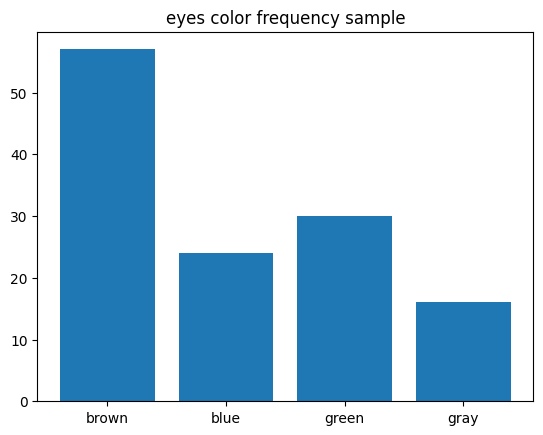

In [58]:
eyes_color_sample = samples['eye_color'].value_counts(sort=False).sort_index()
plt.figure()
plt.bar(list(eyes_color.values()), eyes_color_sample)
plt.title('eyes color frequency sample')
plt.show()

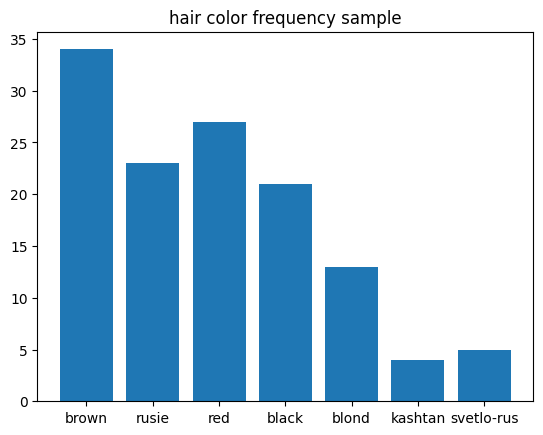

In [60]:
hair_color_sample = samples['hair_color'].value_counts(sort=False).sort_index()
plt.figure()
plt.bar(list(hair_color.values()), hair_color_sample)
plt.title('hair color frequency sample')
plt.show()

In [61]:
hair_color_sample

1    34
2    23
3    27
4    21
5    13
6     4
7     5
Name: hair_color, dtype: int64

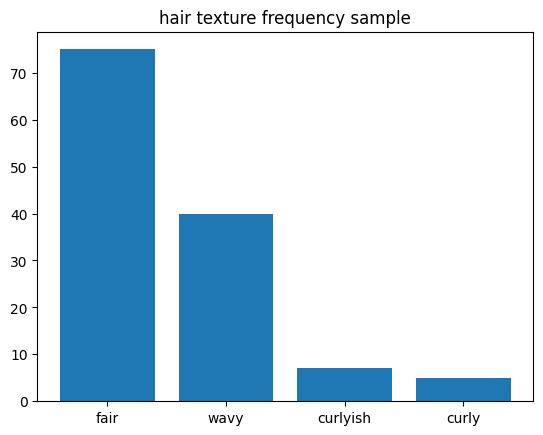

In [63]:
hair_texture_sample = samples['hair_texture'].value_counts(sort=False).sort_index()
plt.figure()
plt.bar(list(hair_texture.values()), hair_texture_sample)
plt.title('hair texture frequency sample')
plt.show()

In [69]:
hair_texture_freq = data['hair_texture'].value_counts(sort=False).sort_index()
hair_color_freq = data['hair_color'].value_counts(sort=False).sort_index()
eyes_color_freq = data['eye_color'].value_counts(sort=False).sort_index()

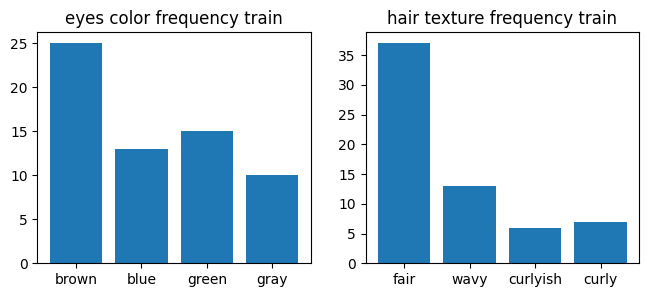

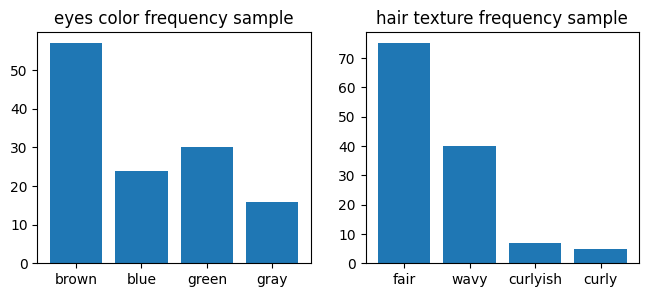

In [92]:
plt.figure(figsize=(12, 3))

plt.subplot(132)
plt.bar(list(eyes_color.values()), freq_eye_train)
plt.title('eyes color frequency train')

plt.subplot(133)
plt.bar(list(hair_texture.values()), hair_texture_train)
plt.title('hair texture frequency train')

#plt.suptitle(t = 'Original set')
plt.show()
plt.figure(figsize=(12, 3))

plt.subplot(132)
plt.bar(list(eyes_color.values()), eyes_color_sample)
plt.title('eyes color frequency sample')

plt.subplot(133)
plt.bar(list(hair_texture.values()), hair_texture_sample)
plt.title('hair texture frequency sample')
#plt.suptitle(t = 'Sample')
plt.show()

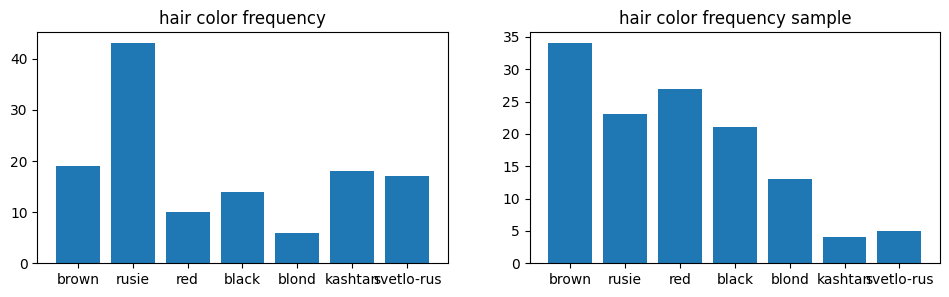

In [76]:
plt.figure(figsize=(18, 3))

plt.subplot(132)
plt.bar(list(hair_color.values()), hair_color_test)
plt.title('hair color frequency')

plt.subplot(133)
plt.bar(list(hair_color.values()), hair_color_sample)
plt.title('hair color frequency sample')
#plt.suptitle(t = 'Sample')
plt.show()

In [803]:
plt.figure(figsize=(12, 4))
brown_eyes_samples = sample[sample.eye_color == 1]
hair_texture_freq2 = brown_eyes_samples['hair_texture'].value_counts(sort=False)
hair_texture_freq2

1    35
2    14
3     5
Name: hair_texture, dtype: int64

<Figure size 1200x400 with 0 Axes>

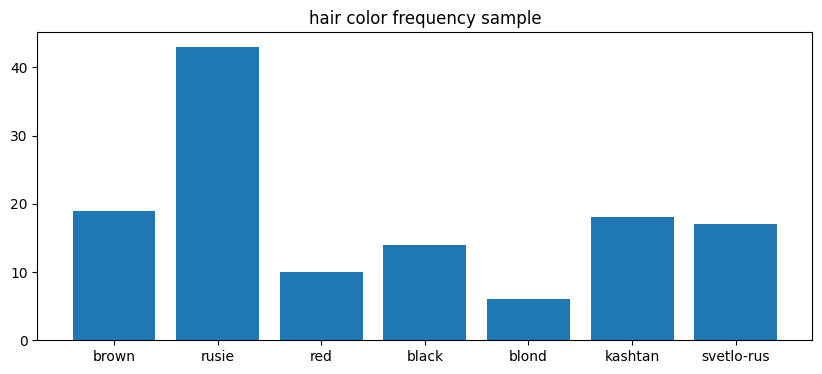

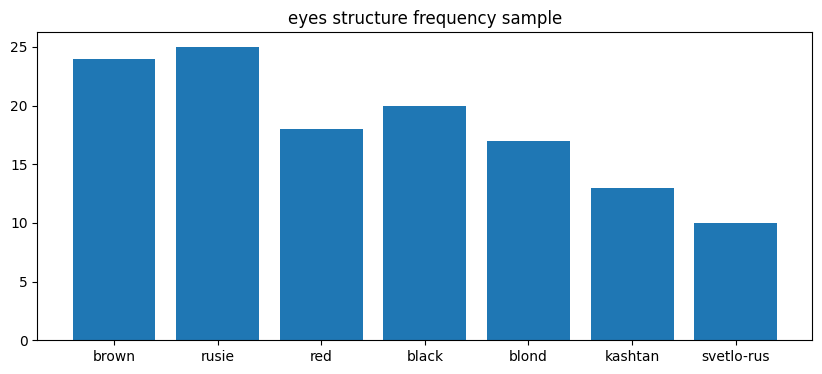

In [804]:
plt.figure(figsize=(10, 4))
plt.bar(list(hair_color.values()), hair_color_freq)
plt.title('hair color frequency sample')
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(list(hair_color.values()), hair_color_freq1)
plt.title('eyes structure frequency sample')
plt.show()

In [806]:
from sklearn.model_selection import train_test_split
davis_df = pd.read_csv("Davis.csv")

#Get rid of impossible values
davis_df = davis_df[davis_df.height > 140].dropna()

#Separate df to test and train saving proportions
davis_train, davis_test = train_test_split(davis_df, train_size=0.5, stratify=davis_df.sex)

In [807]:
#Gradient descent
y = davis_train['weight']
x = davis_train['height'].to_numpy()

w = 1
b = 0
alpha = 0.0001
old_w = []

max_norm = 5
for t in range(10000):
    l = ((1/len(x)) * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    
    norm = np.sqrt(d_w**2 + d_b**2)

    if norm > max_norm:
        reciprocal = norm / max_norm
        d_w /= reciprocal
        d_b /= reciprocal
    w = w - alpha * d_w
    b = b - alpha * d_b
    
    if t % 500 == 0:
        old_w.append(np.array((w, b)))
        
print(w, b)

0.3892978592423704 -0.24589905580556173


In [808]:
#Normalize data before gradient descent
y_norm = (davis_train.weight - davis_train.weight.mean()) / davis_train.weight.std()
x_norm = (davis_train.height - davis_train.height.mean()) / davis_train.height.std()

w_norm = 1
b_norm = 0
old_w_norm = []

max_norm = 5
for t in range(10000):
    l_norm = ((1/len(x_norm)) * np.sum((y_norm - w_norm * x_norm - b_norm)**2))
    d_yh = (w_norm * x_norm + b_norm - y_norm)
    
    d_w = np.mean(d_yh * x_norm)
    d_b = np.mean(d_yh)
    
    norm = np.sqrt(d_w**2 + d_b**2)

    if norm > max_norm:
        reciprocal = norm / max_norm
        d_w /= reciprocal
        d_b /= reciprocal
    w_norm = w_norm - alpha * d_w
    b_norm = b_norm - alpha * d_b
    
    if t % 500 == 0:
        old_w_norm.append(np.array((w_norm, b_norm)))
        
w_norm = w_norm * davis_train.weight.std() / davis_train.height.std()
b_norm = davis_train.weight.mean() + b_norm * davis_train.weight.std() - w_norm * davis_train.height.mean()

print(w_norm, b_norm)

1.312015015346442 -158.56008007005016


TypeError: 'str' object is not callable

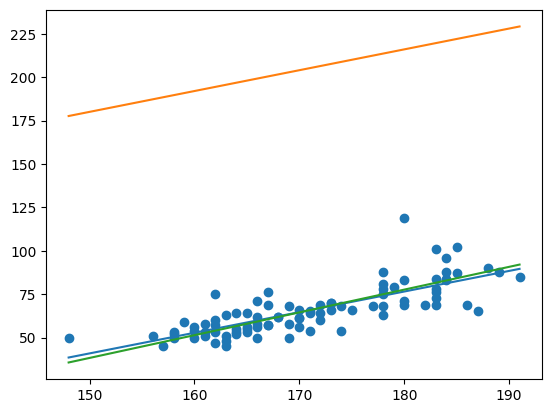

In [812]:
# Compare gradient descent with linear regression
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

x_train = davis_train[["height"]].values.astype(np.double)
y_train = davis_train["weight"].values.astype(np.double)

lreg.fit(x_train, y_train)

x_to_pred = np.linspace(x_train.min(), x_train.max(),30).reshape(-1,1)
lreg_pred = lreg.predict(x_to_pred)
grad_pred = w * x_to_pred + b
grad_pred_norm = w_norm * x_to_pred + b_norm

plt.scatter(davis_train["height"], davis_train["weight"])
plt.plot(x_to_pred[:,0], lreg_pred,label="Linear regression")
plt.plot(x_to_pred[:,0], grad_pred, label="Gradient descent")
plt.plot(x_to_pred[:,0], grad_pred_norm, label="Gradient descent normalized")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

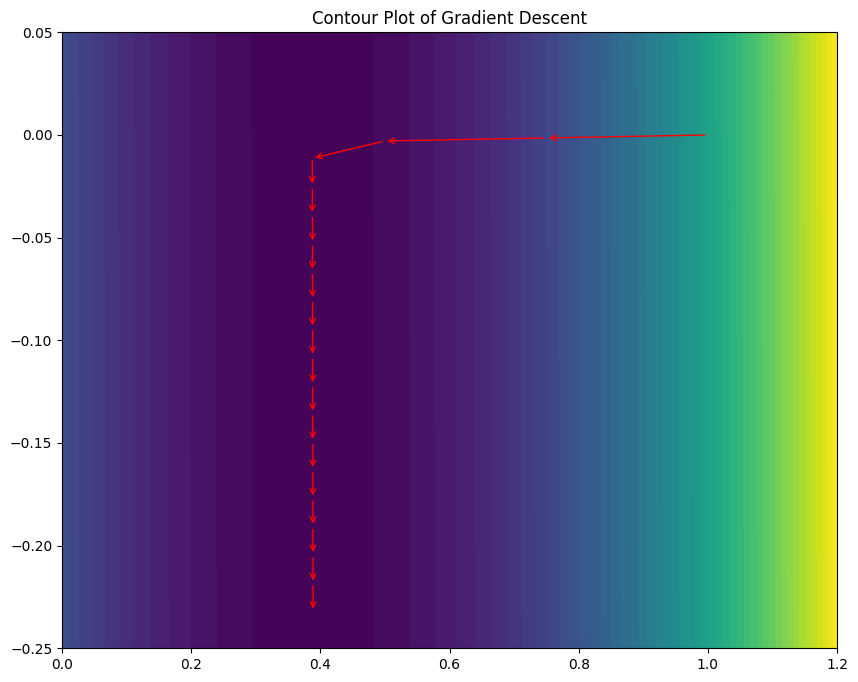

In [814]:
#Plotting gradient descent path
all_ws = np.array(old_w)
ww,bb = np.mgrid[0:1.2:100j, -0.25:0.05:100j]
L = []
heights = davis_train['height'].values.astype(np.float64)
weights = davis_train['weight'].values.astype(np.float64)
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(heights) * np.sum((weights - w * heights - b)**2))
L = np.array(L)
plt.figure(figsize=(10, 8))
plt.title("Contour Plot of Gradient Descent")
#plt.xlabel("w")
#plt.ylabel("b")
plt.contourf(ww,bb,L.reshape(ww.shape),levels=50)

for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')